***特征筛选***

In [16]:
import pandas as pd

titanic = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')
# titanic.info()
# print titanic.head()
y = titanic['survived']
X = titanic.drop(['row.names','name','survived'],axis = 1)

X['age'].fillna(X['age'].mean(),inplace = True)
X.fillna('UNKNOWN',inplace = True)

In [17]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 33)

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
X_train = vec.fit_transform(X_train.to_dict(orient = 'record'))
X_test = vec.transform(X_test.to_dict(orient = 'record'))

print len(vec.feature_names_)

474


In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.817629179331307

In [24]:
from sklearn import feature_selection
fs = feature_selection.SelectPercentile(feature_selection.chi2,percentile=20)
X_train_fs = fs.fit_transform(X_train,y_train)
X_test_fs = fs.transform(X_test)
dt.fit(X_train_fs,y_train)
dt.score(X_test_fs,y_test)

0.8267477203647416

In [33]:
#通过交叉验证的方法,按照固定间隔的百分比筛选特征并作图展示性能随特征筛选比例的变化
from sklearn.cross_validation import cross_val_score
import numpy as np

percentiles = range(1,100,2)
results=[]

for i in percentiles:
    fs = feature_selection.SelectPercentile(feature_selection.chi2,percentile=i)
    X_train_fs = fs.fit_transform(X_train,y_train)
    scores = cross_val_score(dt,X_train_fs,y_train,cv = 5)
    results = np.append(results,scores.mean())
print results

opt = np.where(results == results.max())[0]
print 'Optimal number of feature %d'%percentiles[int(opt)]

[0.85063904 0.85673057 0.87602556 0.88622964 0.86692435 0.86386312
 0.87404659 0.861812   0.86795506 0.87200577 0.86793445 0.86690373
 0.87504638 0.86589363 0.86185323 0.86692435 0.86994434 0.86489384
 0.8577819  0.86184292 0.8597918  0.86083282 0.87198516 0.87097506
 0.87097506 0.86386312 0.87301587 0.86995465 0.86793445 0.86692435
 0.87098536 0.86386312 0.86792414 0.87201608 0.87301587 0.87503608
 0.86488353 0.86791383 0.87097506 0.86792414 0.86893424 0.86586271
 0.86590394 0.85983302 0.85981241 0.86691404 0.86491445 0.86590394
 0.85877139 0.85673057]
Optimal number of feature 7


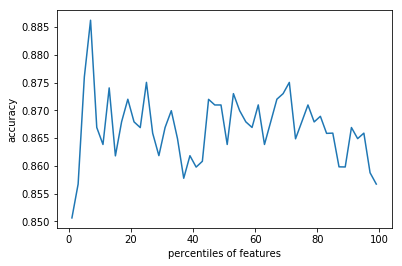

0.8571428571428571

In [36]:
import pylab as pl
pl.plot(percentiles,results)
pl.xlabel('percentiles of features')
pl.ylabel('accuracy')
pl.show()

fs = feature_selection.SelectPercentile(feature_selection.chi2,percentile=7)
X_train_fs = fs.fit_transform(X_train,y_train)
X_test_fs = fs.transform(X_test)
dt.fit(X_train_fs,y_train)
dt.score(X_test_fs,y_test)